# Статистика, DS-поток
## Практическое задание 10. Ядерная оценка плотности

In [101]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import kernel_switch, KDEUnivariate
from sklearn.preprocessing import LabelEncoder


%matplotlib inline

---

## Ядерные оценки

### Задача 1.

В этой задаче вы исследуете различные непараметрические оценки распределений.
Для этого вам выдается почти готовый код функций `draw_ecdf`, `draw_hist` и `draw_pdf`, которые используются для построения ЭФР, гистограммы и ядерной оценки плотности соответственно. В реализациях этих функция часть кода пропущена, вам нужно его дописать. Код предполагает использование реализации ядерных оценок плотности из `statsmodels`.
При желании вы можете написать аналогичный код, используя реализацию в `seaborn`.

In [11]:
def draw_ecdf(sample, grid, cdf=None):
    """
    По сетке cтроит графики эмпирической функции распределения 
    и истинной (если она задана) для всей выборки и для 1/10 ее части.
    
    Вход:
        sample: выборка
        grid: сетка
        cdf: истинная функция распределения из scipy.stats
    """
    
    plt.figure(figsize=(16, 3))
    # Выбирается размер выборки
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        
        # Отрисовываются точки выборки на графике    
        plt.scatter(
            sample[:size], np.zeros(size),
            alpha=0.4, label='sample'
        )
        
        # Если передана истинная функция распределения, 
        # отрисовывается ее график
        if cdf is not None:
            plt.plot(
                grid,
                cdf(grid),
                color='green', alpha=0.3, lw=2, label='true cdf'
            )
        
        # Отрисовывается эмпирическую функцию распределения
        plt.plot(
            grid,
            ECDF(sample[:size])(grid),
            color='red', label='ecdf'
        )
        
        plt.legend()
        plt.grid(ls=':')
        plt.title('sample size = {}'.format(size))
    plt.show()

In [12]:
def draw_hist(sample, grid, pdf=None):
    """
    Строит гистограмму и, по сетке, график истинной плотности 
    (если она задана) для всей выборки и для 1/10 ее части.
    
    Вход:
        sample: выборка
        grid: сетка
        pdf: истинная плотность из scipy.stats
    """
    
    plt.figure(figsize=(16, 3))
    # Выбирается размер выборки
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        
        # Построение гистограммы для выборки
        plt.hist(
            sample[:size], 
            bins=20,
            range=(grid.min(), grid.max()),
            density=True, label='sample hist'
        )
        
        # Если передана истинная плотность, отрисовывается ее график
        if pdf is not None:
            plt.plot(
                grid,
                pdf(grid),
                color='green', alpha=0.3, lw=2, label='true pdf'
            )
        
        plt.legend()
    plt.show()

In [13]:
def draw_pdf(sample, grid, pdf=None):
    """
    По сетке cтроит графики ядерной оценки плотности 
    и истинной плотности (если она задана) для всей выборки 
    и для 1/10 ее части.
    
    Вход:
        sample: выборка
        grid: сетка
        pdf: истинная плотность из scipy.stats
    """
    
    plt.figure(figsize=(16, 3))
    # Выбирается размер выборки
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        
        # Отрисовка точек выборки на графике
        plt.scatter(
            sample[:size], np.zeros(size),
            alpha=0.4, label='sample'
        )
        
        # Если передана истинная плотность, отрисовывается ее график
        if pdf is not None:
            plt.plot(
                grid,
                pdf(grid),
                color='green', alpha=0.3, lw=2, label='true pdf'
            )
        
        # Отрисовывается KDE
        kde = KDEUnivariate(sample[:size])
        kde.fit(kernel='gau')
        plt.plot(
            grid,
            kde.evaluate(grid),
            color='red', label='kde'
        )
        
        plt.legend()
        plt.grid(ls=':')
    plt.show()

Используя реализованные выше функции, постройте график эмпирической функции распределения (ЭФР), гистограмму и график ядерной оценки плотнотности к выборкам размера 500 для следующих распределений:

In [16]:
def plot_dist(dist, xlims, sample_size=500):
    grid = np.linspace(xlims[0], xlims[1], 1000)
    sample = dist.rvs(size=sample_size)
    draw_ecdf(sample, grid, dist.cdf)
    draw_hist(sample, grid, dist.pdf)
    draw_pdf(sample, grid, dist.pdf)

*1. Равномерное распределение $U[0,1]$*. Графики функции распределения и плотностей строить на интервале $(-0.2, 1.2)$.

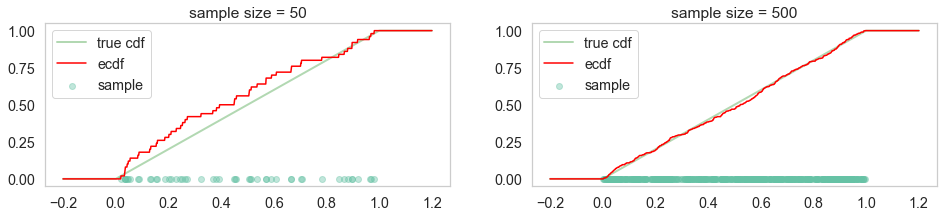

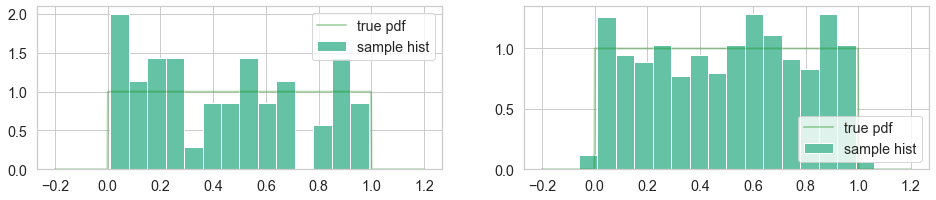

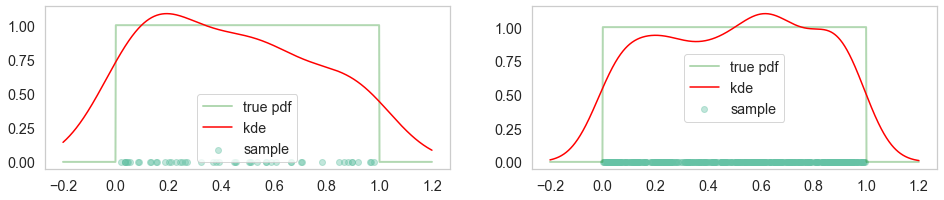

In [17]:
plot_dist(sps.uniform, [-0.2, 1.2])

*2. Нормальное распределение $\mathcal{N}(0, 1)$.* Графики функции распределения и плотностей строить на интервале $(-3, 3)$.

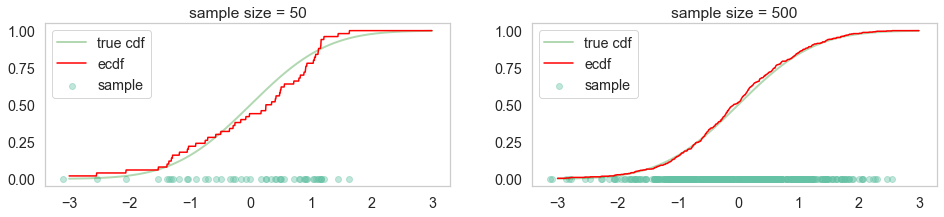

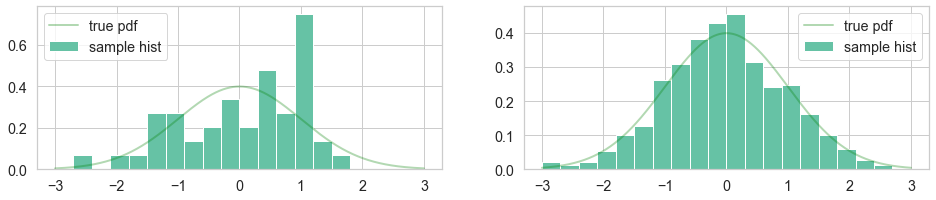

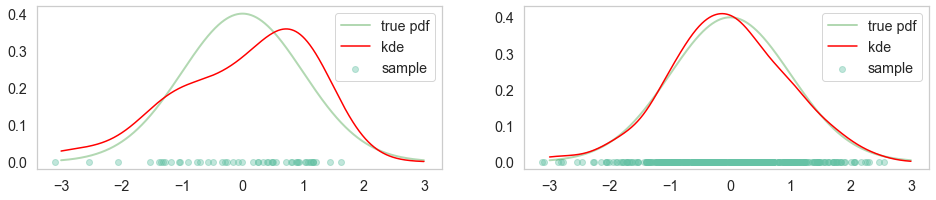

In [18]:
plot_dist(sps.norm, [-3, 3])

*3. Экспоненциальное распределение $Exp(1)$.* Графики функции распределения и плотностей  строить на интервале $(-0.5, 5)$.

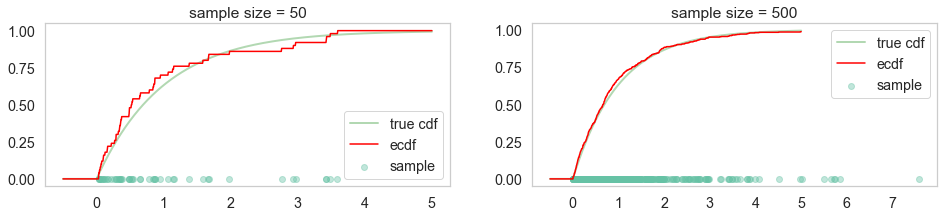

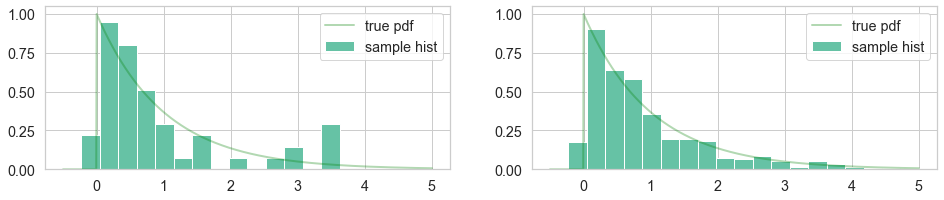

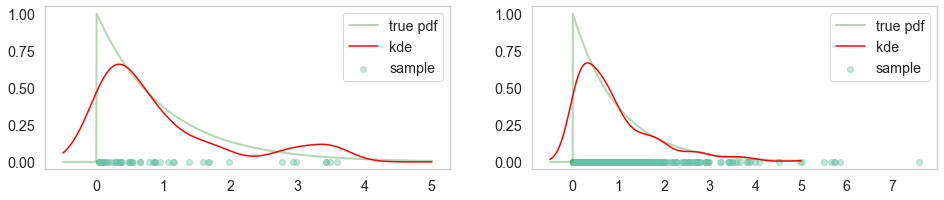

In [19]:
plot_dist(sps.expon, [-0.5, 5])

Опишите полученные результаты, сравните их между выборками из различных распределений.

**Вывод:**

*Для небольшого размера выборки эмпирические функции распределения и плотности достаточно близки к истинным, но все же имеют заметные отклонения. Ядерные оценки плотности близки к истинным в случае нормального и экспоненциального распределения, так как плотность равномерного изменяется скачкообразно, а ядро для исследования взято гауссово, есть равномерно непрерывная функция. При увеличении размера выборки в 10 раз во всех трех случаях эмпирические распределения и их ядерные оценки лежат близко к . Эксперимент подверждает ассимтотические свойства эмпирических распределений (т. Гливенко-Кантелли) и ядерных оценок плотности(аналог т Гливенко-Кантелли)*

---
### Задача 2.

Исследуйте вид ядерной оценки плотности в зависимости от вида ядра и его ширины.

Для этого сгенерируйте выборку $X_1, ..., X_{200}$ из распределения $U[0, 1]$ и постройте серию графиков для различной ширины гауссовского ядра, а затем другую серию графиков для различных типов ядер при фиксированной ширине. На каждом графике на отрезке $[-0.2, 1.2]$ должны быть изображены истинная плотность (полупрозрачным цветом) и ее ядерная оценка, а так же с нулевой $y$-координатой должны быть нанесены точки выборки. Для экономии места стройте графики в два столбца.

Вам выдется почти готовый код для выполнения задания с некоторыми пропусками. Код предполагает использование реализации ядерных оценок плотности из `statsmodels`. При желании вы можете написать аналогичный код, используя реализацию в `seaborn`. При построении KDE разрешается использовать цикл.

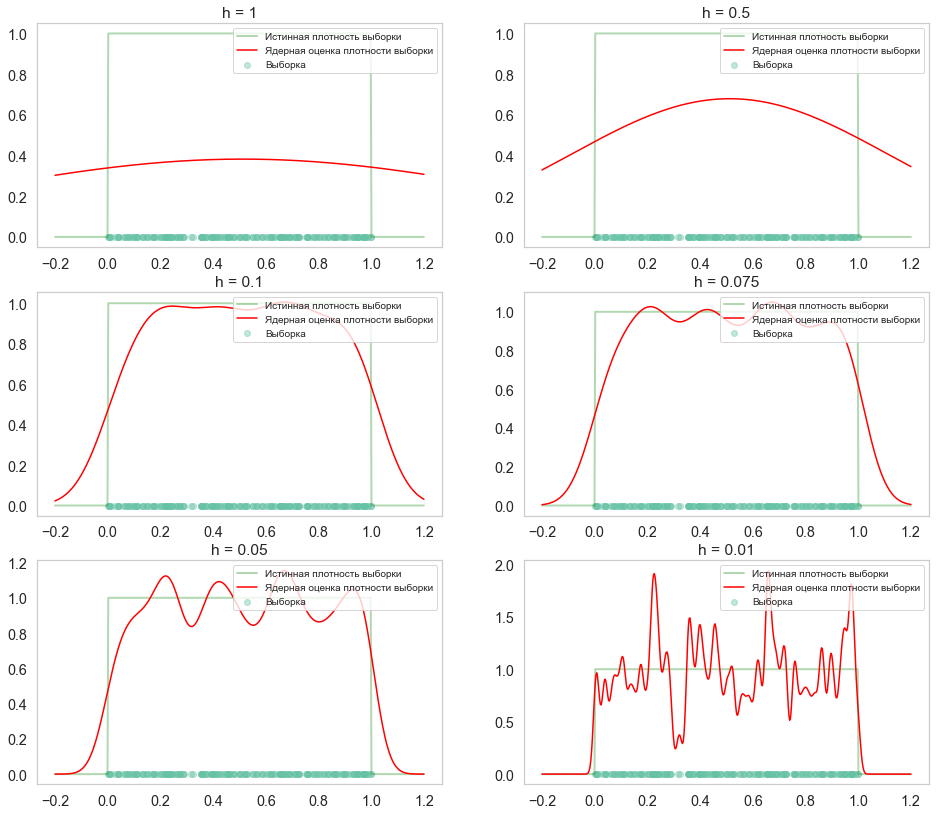

In [51]:
# Размер выборки
size = 200
# Выборка размера size
sample = sps.uniform.rvs(size=size)
# Сетка на отрезке из условия
grid = np.linspace(-0.2, 1.2, 500)

plt.figure(figsize=(16, 14))

# Итераций по ширине ядра
for i, bw in enumerate([1, 0.5, 0.1, 0.075, 0.05, 0.01]):
    plt.subplot(3, 2, i + 1)
    # Построение KDE
    kernel_density = KDEUnivariate(sample)
    kernel_density.fit(kernel="gau", bw=bw)
    # Отображение элементов выборки
    plt.scatter(sample, np.zeros(size), alpha=0.4, label='Выборка')
    # Построение истинной плотности выборки
    plt.plot(grid, sps.uniform.pdf(grid), color='green', 
             alpha=0.3, lw=2, label='Истинная плотность выборки')
    # Отображение KDE плотности
    plt.plot(grid, kernel_density.evaluate(grid), 
             color='red', label='Ядерная оценка плотности выборки')
    plt.legend(loc=1, prop={'size': 10})
    plt.grid(ls=':')
    plt.title('h = {}'.format(bw))

*Из всех исследованных значений наиболее близкая ядерная плотность к исходной при h=0.1. Зафиксируем это значение.*

Во втором случае графики постройте аналогичным образом, проведя итерации по типу ядра.

In [37]:
h = 0.1

In [22]:
kernels = kernel_switch.keys()

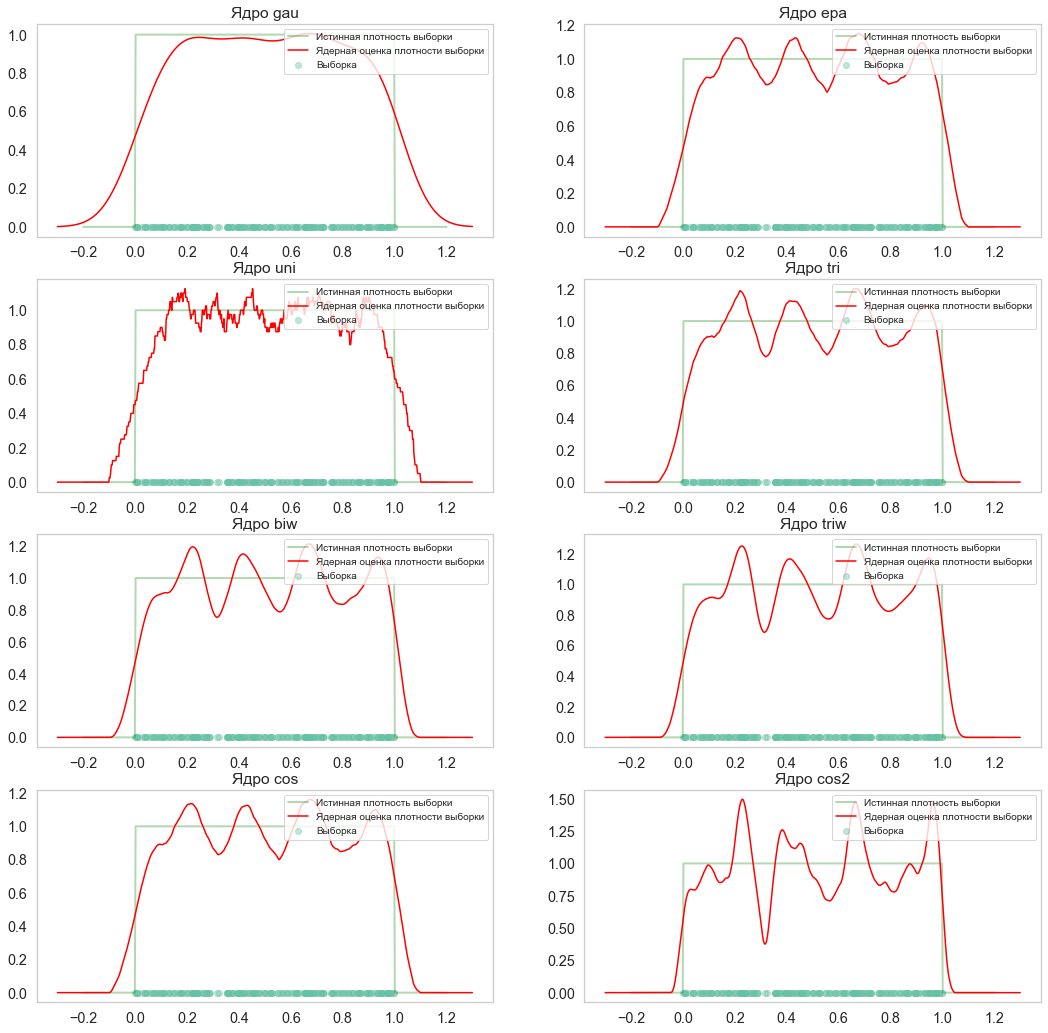

In [54]:
plt.figure(figsize=(18, 18))

# Итераций по ширине ядра
for i, kernel in enumerate(kernels):
    plt.subplot(4, 2, i + 1)
    # Построение KDE
    kernel_density = KDEUnivariate(sample)
    kernel_density.fit(kernel=kernel, bw=h, gridsize=1000, fft=False)
    # Отображение элементов выборки
    plt.scatter(sample, np.zeros(size), alpha=0.4, label='Выборка')
    # Построение истинной плотности выборки
    plt.plot(grid, sps.uniform.pdf(grid), color='green', 
             alpha=0.3, lw=2, label='Истинная плотность выборки')
    # Отображение KDE плотности
    plt.plot(kernel_density.support, kernel_density.density, 
             color='red', label='Ядерная оценка плотности выборки')
    plt.legend(loc=1, prop={'size': 10})
    plt.grid(ls=':')
    plt.title('Ядро {}'.format(kernel))

**Вывод:**

*Ширина ядра сильнее влияет на вид плотности, чем тип ядра - построенные ЯОП при одинаковой ширины хоть и различаются, но не так значительно как ЯОП при разных ширинах ядер. Так как ЯОП приближает истинную плотность в пределе, при небольших размерах выборки надо тщательно подбирать параметр ширины.*

---

## Корреляции, важность признаков

### Задача 3.

Вам выдается сводная статистика о посетителях сайта mipt-stats.gitlab.io и вики-страниц за период с февраля по май этого года. В каждой ячейке таблицы записано количество посетителей определенного условия, которые хотя бы раз посетили указанные выше ресурсы. Пол посетителя определяется технологией Яндекс.Метрики.

In [55]:
data = pd.DataFrame(
    {'Мужской': [7160, 3286, 224, 143, 1022, 826],
     'Женский': [3318, 1593, 69, 87, 328, 508]},
    index=['Chrome', 'Яндекс Браузер', 'Firefox', 
           'Safari', 'Opera', 'Edge']    
)
data

,Мужской,Женский
Chrome,7160,3318
Яндекс Браузер,3286,1593
Firefox,224,69
Safari,143,87
Opera,1022,328
Edge,826,508


Проверьте гипотезу о том, что тип используемого браузера не зависит от пола посетителя. Сделайте вывод.

*Можно переформулировать гипотезу так: 2 выборки (М/Ж) из одного распределения. Для проверки можно использовать критерий хи-квадрат, условия применимости выполняются. Данная таблица уже являяется таблицей сопряженности*

In [74]:
data.T

,Chrome,Яндекс Браузер,Firefox,Safari,Opera,Edge
Мужской,7160,3286,224,143,1022,826
Женский,3318,1593,69,87,328,508


In [81]:
chi2, p, dof, expected = sps.chi2_contingency(data.T)
p

1.449572304539852e-14

*Гипотеза отвергается. Результат стат значим, но, кажется, практически не значим (что дает информация что тип браузера может как-то зависеть от пола?)*

---
### Задача 4.

Вспомним задачу из домашнего задания 3.2, в котором вы рассмотрели изображения образцов листьев и построили проекцию этих данных на несколько первых главных компонент. Посчитайте и визуализируйте матрицу коэффициентов корреляции Пирсона для полученных проекций. То есть в клетке с индексами $(i , j)$ должен быть коэффициент корреляции Пирсона между проекциями на $i$-ую и $j$-ую главные компоненты. Можете ли вы объяснить полученный эффект теоретически?

---
### Задача 5.

Скачайте <a href="http://archive.ics.uci.edu/ml/datasets/Bank+Marketing">данные</a> маркетинговых кампаний португальского банковского учреждения. Цель задачи &mdash; с целью дальнейшего исследования понять, какие условия (среди 20 признаков) влияют на подписание клиентом срочного депозита (величина $y$). Выполните задачу двумя способами:

* методами анализа зависимостей, выяснив, какие характеристики клиента оказывают влияние на целевую переменную, и указав степень влияния;
	
* вычислив важность признаков, полученной с помощью Random Forest, разбив предварительно данные на обучающую и тестовую части.
	
Проинтерпретируйте полученные результаты.
	
*Напоминание*: в случае отбора признаков с целью дальнейшего исследования можно применять методы, контролирующие FDR на уровне не более 0.1.

In [100]:
bank_data = pd.read_csv('./bank-full.csv', sep=';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [88]:
bank_data.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [102]:
categorical_features = ['job', 'marital', 'education', 
                        'default', 'housing', 'loan', 'contact', 'month', 'campaign', 'previous', 'poutcome', 'y']

In [103]:
bank_data_le = bank_data.copy()
le = LabelEncoder()

for cf in categorical_features:
    le_feature = le.fit_transform(bank_data_le[cf])
    bank_data_le[cf] = le_feature

In [104]:
bank_data_le

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,0,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,0,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,0,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,0,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,0,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,2,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,1,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,4,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,3,-1,0,3,0


*Т.к может искать зависимость только категориальных признаков, меняем чисто вещественые 'balance', 'duration' на бины*

In [116]:
bank_data_le['balance'].nunique()

7168

In [117]:
bank_data_le['duration'].nunique()

1573

In [118]:
bank_data_le['balance'] = le.fit_transform(pd.cut(bank_data_le.balance, bins=30))
bank_data_le['duration'] = le.fit_transform(pd.cut(bank_data_le.duration, bins=15))

*Тут количество бинов выбрано почти от балды, так как нет времени исследовать оптимальное количество.*

In [119]:
bank_data_le

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2,1,0,2,5,8,0,0,-1,0,3,0
1,44,9,2,1,0,2,1,0,2,5,8,0,0,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,0,0,-1,0,3,0
3,47,1,1,3,0,2,1,0,2,5,8,0,0,-1,0,3,0
4,33,11,2,3,0,2,0,0,2,5,8,0,0,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,2,0,0,0,17,9,2,2,-1,0,3,1
45207,71,5,0,0,0,2,0,0,0,17,9,1,1,-1,0,3,1
45208,72,5,1,1,0,3,0,0,0,17,9,3,4,184,3,2,1
45209,57,1,1,1,0,2,0,0,1,17,9,1,3,-1,0,3,0


*1. Age*

*Проверка условия применимости: должно быть что в меньше чем 5% ячеек кол-во < 5*

In [130]:
sum(np.unique(bank_data_le.age, return_counts=True)[1] < 5) / len(np.unique(bank_data_le.age, return_counts=True)[1])

0.1038961038961039

In [133]:
unique = np.unique(bank_data_le.age, return_counts=True)
ok = unique[1][:-8]
to_merge = np.array([unique[1][-8:].sum()])
unique = np.hstack((ok, to_merge))

---
### Задача 6.

Рассмотрим задачу регрессии. Мы уже научились оценивать зависимость $y(x)$, но это только точечная оценка для каждого конкретного $x$. На практике бывает необходимо строить доверительные интервалы, которые в совокупности образуют доверительные ленты. Поскольку мы ничего не знаем про распределение ошибок, будем строить доверительную ленту по методу бутстрепа.

1. Сгенерируем достаточно большое число бутстрепных выборок.

2. Обучим модели и получим значения $\widehat{y}(x)$, для всех значений $x$ по сетке значений.

3. По предсказаным значениям оценим верхнюю и нижнюю границы ленты с помощью методов построения бутстрепных доверительных интервалов.

Напишите функцию, которая реализует данный метод

In [ ]:
def bootstrap_confidence_interval(X, Y, model, X_grid, 
                                  bootstrap_count=<...>, alpha=0.95, model_args=None):
    '''
    Построение предсказательной ленты для модели регрессии.
    
    X, Y - выборка;
    model - класс модели;
    X_grid - сетка для доверительной ленты;
    alpha - уровень доверия;
    bootstrap_count - количество бутстрепных выборок
    model_args - параметры модели.
    '''
    
    predictions = []

    for _ in tqdm(np.arange(bootstap_count)):
        bootstap_model = model(model_args)
        <...>
        predictions.append(bootstrap_model.predict(<...>))

    lower_bound = <...>
    upper_bound = <...>
    return lower_bound, upper_bound

Рассмотрим датасет cps71 из семинара

In [2]:
data = pd.read_csv('cps71.csv', index_col=0)
data.head()

,logwage,age
1,11.1563,21
2,12.8131,22
3,13.0960,22
4,11.6952,22
5,11.5327,22


Разделим нашу выборку на обучающую и тестовую

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Постройте доверительные ленты для моделей линейной регрессии, ядерной регрессии и KNN-регрессии.
Изобразите на графике также предсказания каждой модели и обучающую выборку.

*Примечание: для классов из statmodels сигнатура класса может не совпадать со стандартной, поэтому сделайте для этих классов, класс-обертку, который в себе просто будет вызывать нужные методы.*

Сделайте выводы

**Вывод:**

<...>